# COGS 108 - Final Project 

# Overview

Nowadays, restaurant would be a place for lots for people to relax their mind or promote the relationship with other people. However, even though people cannot live without restaurant,yelp is a really useful app can determine a restaurant good or not.Therefore, base on the date that professor provided, I would like to analyze the relation between yelp rating with what kind of factor, income of that areas, family below the poverty line and so on.In this project, we first introduced the background of this topic. Then we visualized and analyzed the dataset. The last but not least, I would conclude base on the graph that I analyse

# Name & GitHub

- Name: Zehua Tang  A15684746
- GitHub Username: MCsweetsoup

# Research Question

In order to understand the importance of restaurant rating have relationship with what kind of he factors, I am going to analysis the data with all possible factor that can effect restaurant rating and see which is the heaviest factor.

1) What is the relationship between yelp rating and food prices?

2) How salary income effect yelp rating? 

3) How poverty effect yelp rating within that areas?

## Background and Prior Work

The reason yelp is important because it combined all the consumer review and restaurant information, which it also receives high priority from google search engine results. Furthermore, it also bring to the benefit for people to know which restaurant it worth to go and the one should be close.
 

References (include links):
- 1)https://www.google.com/search?q=how+important+yelp+effect+restaurants&rlz=1C1CHBD_enUS766US766&oq=how+important+yelp+effect+resta&aqs=chrome.1.69i57j33l2.15395j0j7&sourceid=chrome&ie=UTF-8

# Hypothesis


I believe the only matter will affect the yelp rating will be the price of the restaurant, but also it may have other factor that will effect the yelp rating. The price of the restaurant should have an indirect relationship with that area family income and the percent of poverty. 

# Dataset(s)


(Copy this information for each dataset)
- Dataset Name:yelp.csv zip.csv
- Link to the dataset: All provided from professor 
- Number of observations:yelp.rating zipcode and income of different area, poverty percentage

yelp.csv: rating for each restaruant with all restaurant information

zip.csv: with all information within that ares, such as income and the percentage below poverty line

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats


In [2]:
ins = pd.read_csv('inspections.csv')


In [3]:
yelp = pd.read_csv("yelp.csv")
yelp

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,carter-finley-stadium-raleigh,carter-finley stadium,False,3.5,23,4600 Trinity Rd,27607,35.801217,-78.719568,19198344000,...,False,False,False,False,False,False,False,False,False,False
3684,raleigh-little-theatre-raleigh,raleigh little theatre,False,3.5,24,301 Pogue St,27607,35.791430,-78.668820,19198213111,...,False,False,False,False,False,False,False,False,False,False
3685,sky-zone-trampoline-park-durham-durham,"sky zone trampoline park, durham",False,4.0,12,1720 Guess Rd,27701,36.020901,-78.914003,19194250800,...,False,False,False,False,False,False,False,False,False,False
3686,highgrove-estate-fuquay-varina,highgrove estate,False,3.5,4,1613 S Main St,27526,35.557201,-78.807747,19195526154,...,False,False,False,False,False,False,False,False,False,False


In [4]:
zc = pd.read_csv("zipcodes.csv")
zc

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9
5,27519,137193,121815,45778,3.2,2.3,2.3,35.2
6,27520,67939,58455,25628,5.0,7.8,2.4,23.5
7,27522,66250,59221,25513,6.0,7.0,4.2,31.4
8,27523,89184,68342,36976,3.1,3.1,1.8,22.4
9,27526,74666,66025,28074,8.4,8.3,3.9,22.5


# Data Cleaning

Describe your data cleaning steps here.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

yelp = yelp[['name','rating','zip_code','price']]
yelp.columns = ['name','rating','zip','price']
yelp = yelp.iloc[0:3500,:]
yelp = yelp.dropna(axis='rows')

yelp

,name,rating,zip,price
0,42nd street oyster bar - rdu airport,2.5,27560,$$
1,aldi foods,4.0,27519,$
2,luciano pizzeria ristorante,5.0,27612,$
3,olive garden italian restaurant,3.0,27893,$$
4,subway,3.5,27896,$
...,...,...,...,...
3493,counting house,4.0,22701,$$$
3494,revolution,3.5,27701,$$$
3496,san jose's tacos & tequila,3.5,27617,$$
3497,wild wing cafe,3.0,27617,$$


In [6]:
zc = zc[['zip','median_family_income_dollars','percent_damilies_below_poverty_line']]
zc = zc.dropna(axis='rows')
zc

,zip,median_family_income_dollars,percent_damilies_below_poverty_line
0,27501,59408,10.5
1,27502,109891,3.4
2,27511,82292,9.6
3,27513,109736,3.8
4,27518,125432,5.5
5,27519,137193,3.2
6,27520,67939,5.0
7,27522,66250,6.0
8,27523,89184,3.1
9,27526,74666,8.4


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [7]:
# merge to dataframe into one

In [8]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
graph = zc.merge(yelp,on='zip')
graph


,zip,median_family_income_dollars,percent_damilies_below_poverty_line,name,rating,price
0,27501,59408,10.5,sunni sky's homemade ice cream,4.5,$
1,27501,59408,10.5,pizza hut,4.0,$$
2,27501,59408,10.5,bitter melon asian market,5.0,$
3,27501,59408,10.5,simon'z restaurant,4.0,$$
4,27501,59408,10.5,food lion 1622,4.0,$$
...,...,...,...,...,...,...
2415,27703,60783,12.7,bruegger's bagels,4.5,$
2416,27703,60783,12.7,serena sicilian influenced gastropub,3.5,$$
2417,27703,60783,12.7,randy's pizza,4.0,$
2418,27703,60783,12.7,jimmy john's,2.5,$


In [9]:
# changing $ symbol to number in order to graph

In [10]:
graph = graph.replace('$',1)
graph = graph.replace('$$',2)
graph = graph.replace('$$$',3)
graph = graph.replace('$$$$',4)

In [11]:
#Take a look for rating distribution

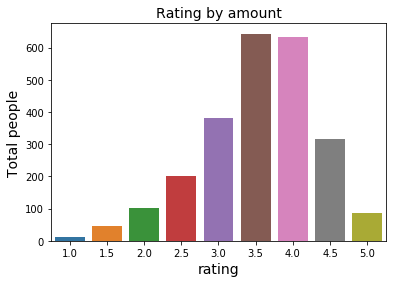

In [12]:
sns.countplot(data=graph, x = 'rating')

plt.ylabel('Total people', fontsize=14)
plt.xlabel('rating', fontsize=14)
plt.title("Rating by amount", fontsize=14)
f1 = plt.gcf()

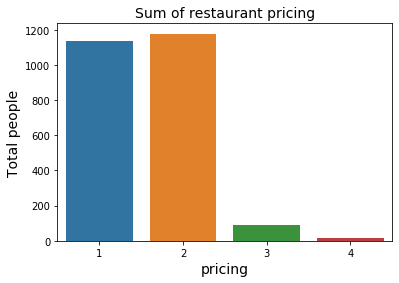

In [13]:
sns.countplot(data=graph, x = 'price')
plt.ylabel('Total people', fontsize=14)
plt.xlabel('pricing', fontsize=14)
plt.title("Sum of restaurant pricing", fontsize=14)
f1 = plt.gcf()

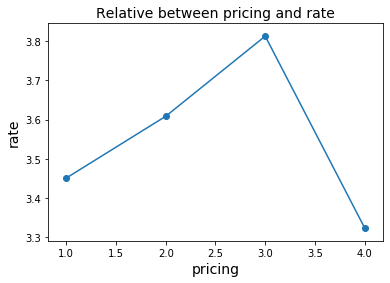

In [14]:
one = graph[graph['price']==1]
two = graph[graph['price']==2]
three = graph[graph['price']==3]
four = graph[graph['price']==4]
y =[one['rating'].mean(),two['rating'].mean(),three['rating'].mean(),four['rating'].mean()]

plt.plot([1,2,3,4],y)
plt.scatter([1,2,3,4],y)

plt.ylabel('rate', fontsize=14)
plt.xlabel('pricing', fontsize=14)
plt.title("Relative between pricing and rate", fontsize=14)
f1 = plt.gcf()

In [15]:
loop = graph['median_family_income_dollars'].unique()
loop

array([ 59408, 109891,  82292, 109736, 125432, 137193,  67939,  66250,
        89184,  74666,  68627,  88121,  96650,  72301,  97917,  86250,
        96247,  59892,  66160,  68750,  59395,  28641,  68608,  57419,
       109886,  61324,  85325, 125019,  73715,  49213,  98452, 106854,
       119232,  98884,  60033,  98642,  60783], dtype=int64)

In [16]:
array = []
final = []
for number in loop:
    array.append(graph[graph['median_family_income_dollars']==number]['price'].mean())
array
for index in array:
    index = str(round(index, 2))
    final.append(float(index))
final

[1.33,
 1.57,
 1.64,
 1.7,
 1.66,
 1.63,
 1.45,
 1.33,
 1.41,
 1.51,
 1.52,
 1.36,
 1.51,
 1.35,
 1.57,
 1.18,
 1.57,
 1.5,
 1.5,
 1.14,
 1.45,
 1.67,
 1.65,
 1.5,
 1.75,
 1.33,
 1.44,
 1.64,
 1.75,
 1.44,
 1.72,
 1.51,
 1.59,
 1.62,
 1.57,
 1.62,
 1.39]

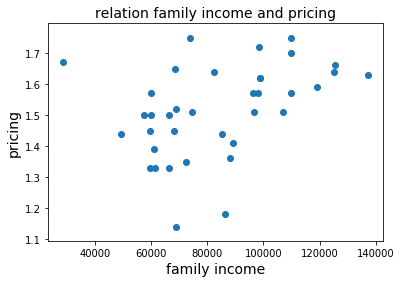

In [17]:

plt.scatter(loop,final)
plt.xlabel('family income', fontsize=14)
plt.ylabel('pricing', fontsize=14)
plt.title("relation family income and pricing", fontsize=14)
f1 = plt.gcf()

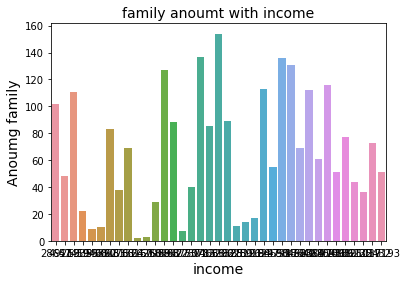

In [18]:
sns.countplot(data=graph, x = 'median_family_income_dollars')
plt.ylabel('Anoumg family', fontsize=14)
plt.xlabel('income', fontsize=14)
plt.title("family anoumt with income", fontsize=14)
f1 = plt.gcf()

In [19]:
graph['rating'].unique()

array([4.5, 4. , 5. , 2. , 3.5, 3. , 2.5, 1.5, 1. ])

In [20]:
x = []
answer = []
x.append(graph[graph['rating']==1]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==1.5]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==2]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==2.5]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==3]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==3.5]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==4]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==4.5]['median_family_income_dollars'].mean())
x.append(graph[graph['rating']==5]['median_family_income_dollars'].mean())
for index in x:
    index = str(round(index, 2))
    answer.append(float(index))
answer


[91734.18,
 82512.19,
 82234.45,
 81854.94,
 86176.64,
 86122.16,
 86666.52,
 81936.36,
 84506.55]

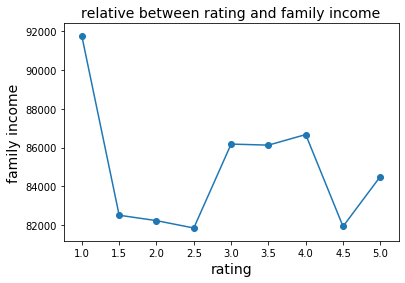

In [21]:

plt.plot([1,1.5, 2,2.5, 3,3.5, 4,4.5,5],answer)
plt.scatter([1,1.5, 2,2.5, 3,3.5, 4,4.5,5],answer)
plt.ylabel('family income', fontsize=14)
plt.xlabel('rating', fontsize=14)
plt.title("relative between rating and family income", fontsize=14)
f1 = plt.gcf()

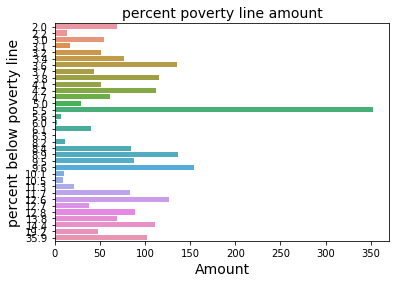

In [22]:
sns.countplot(data=graph, y = 'percent_damilies_below_poverty_line')
plt.xlabel('Amount', fontsize=14)
plt.ylabel('percent below poverty line', fontsize=14)
plt.title("percent poverty line amount", fontsize=14)
f1 = plt.gcf()

In [23]:
x1 = []
answer1 = []
x1.append(graph[graph['rating']==1]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==1.5]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==2]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==2.5]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==3]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==3.5]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==4]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==4.5]['percent_damilies_below_poverty_line'].mean())
x1.append(graph[graph['rating']==5]['percent_damilies_below_poverty_line'].mean())
for index in x1:
    index = str(round(index, 2))
    answer1.append(float(index))
answer1

[7.6, 9.04, 8.63, 8.88, 8.14, 8.51, 9.03, 10.03, 8.63]

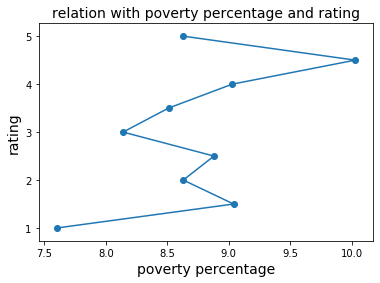

In [24]:
plt.plot(answer1,[1,1.5, 2,2.5, 3,3.5, 4,4.5,5])
plt.scatter(answer1,[1,1.5, 2,2.5, 3,3.5, 4,4.5,5])
plt.xlabel('poverty percentage', fontsize=14)
plt.ylabel('rating', fontsize=14)
plt.title("relation with poverty percentage and rating", fontsize=14)
f1 = plt.gcf()

# Ethics & Privacy

Although this data is provided by the professor, and this data includes the name of the restaurant, location, critical, rating.I believe the data have all the necessary information about the restaurant that customers should know.For the violation.csv it includes the information about the problem that has been found, which this information may be hard to find,but it should be known by the customer, for preventing foodborne illnesses. The only bias I think is the data for the restaurant is only limited to the NC state, which can not represent the entire yelp rating, because yelp is included restaurant overall entire United States, therefore, this analysis only can represent the situation of that area.


# Conclusion & Discussion

In conclusion, base on the graph that I plot, and my observation is that the only price of the restaurant affects the yelp rating, which it is higher prices usually have a higher rating. In addition, the family income has no direct relationship with a rating as well as poverty have not to affect on yelp rating base on the plot that I observed. Furthermore, I plot a diagram to identify whether the family income of that area will affect that area restaurant price, and the result is negative.